## Chargement et préparation des données


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from scripts.features.processing import filter_and_analyze_dataset
from scripts.visualization.data_quality_viz import plot_data_quality_dashboard

df = pd.read_csv('../data/en.openfoodfacts.org.products.csv', 
                 sep='\t',
                 encoding='utf-8',
                 low_memory=False,
                 on_bad_lines='skip',
                 nrows=100000)

1. Analyse de la qualité des données initiales :
Dimensions initiales : (300000, 206)
Types de données : 
{dtype('float64'): 132, dtype('O'): 71, dtype('int64'): 3}


2. Filtrage des colonnes avec trop de valeurs manquantes :
Colonnes supprimées : 157
Nouvelles dimensions : (300000, 49)


3. Analyse des corrélations :
Colonnes corrélées supprimées : 2
Nouvelles dimensions : (300000, 47)


4. Analyse des distributions catégorielles :
'url' a trop de catégories : 299998
'creator' a trop de catégories : 2768
'created_datetime' a trop de catégories : 218220
'last_modified_datetime' a trop de catégories : 216515
'last_modified_by' a trop de catégories : 3851
'last_updated_datetime' a trop de catégories : 152650
'product_name' a trop de catégories : 203553
'brands' a trop de catégories : 25344
'brands_tags' a trop de catégories : 20892
'categories' a trop de catégories : 15812
'categories_tags' a trop de catégories : 10718
'categories_en' a trop de catégories : 10717
'countries' a trop de ca

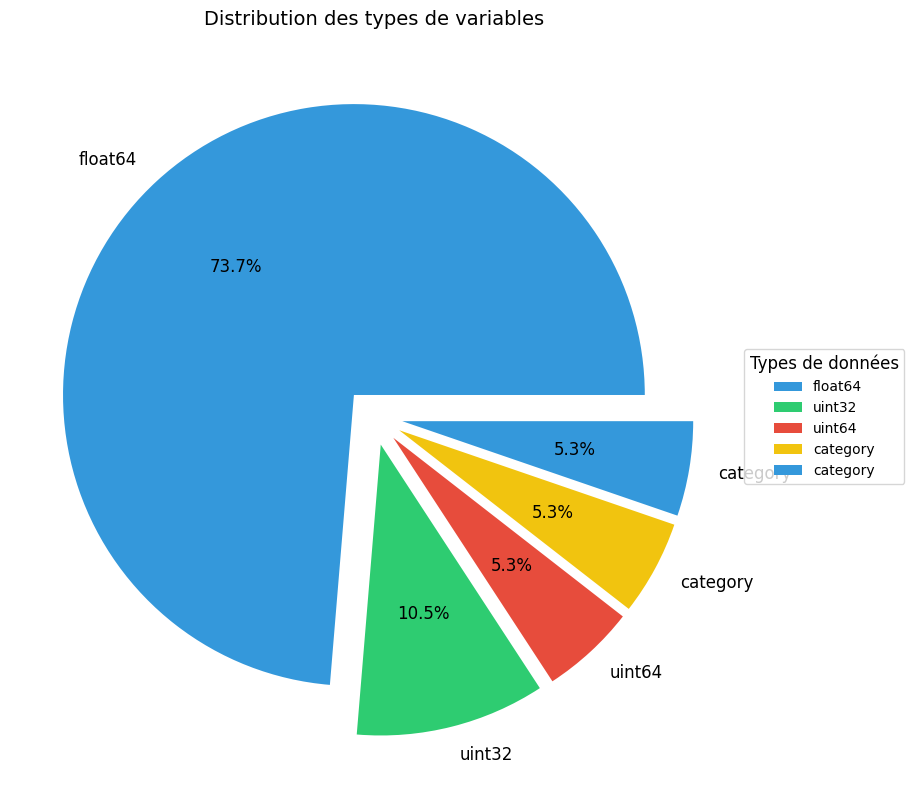

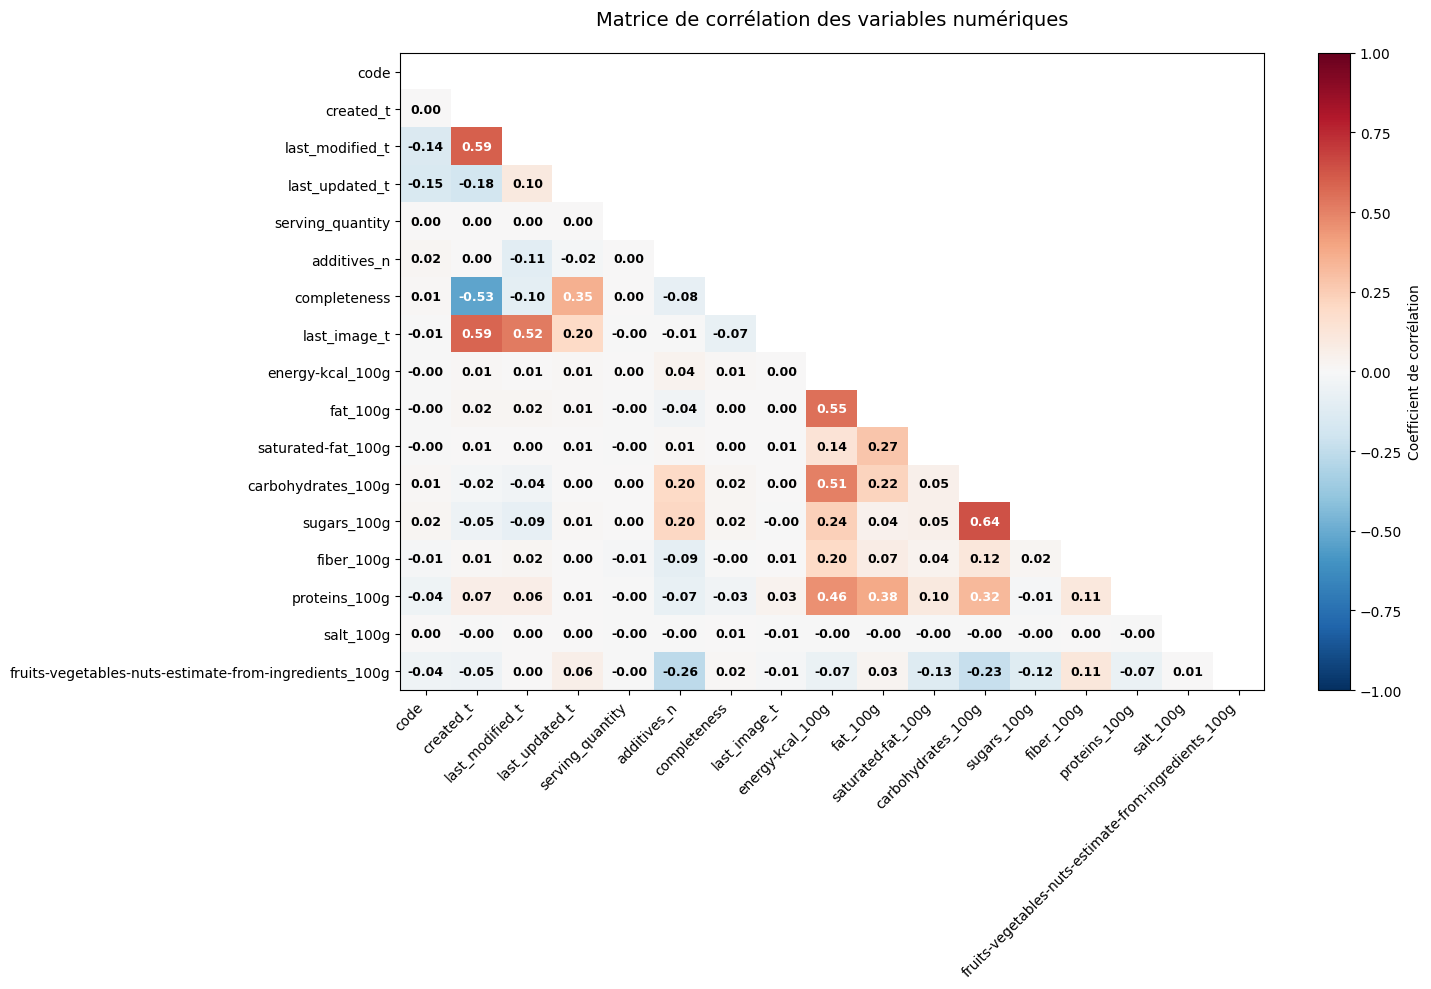

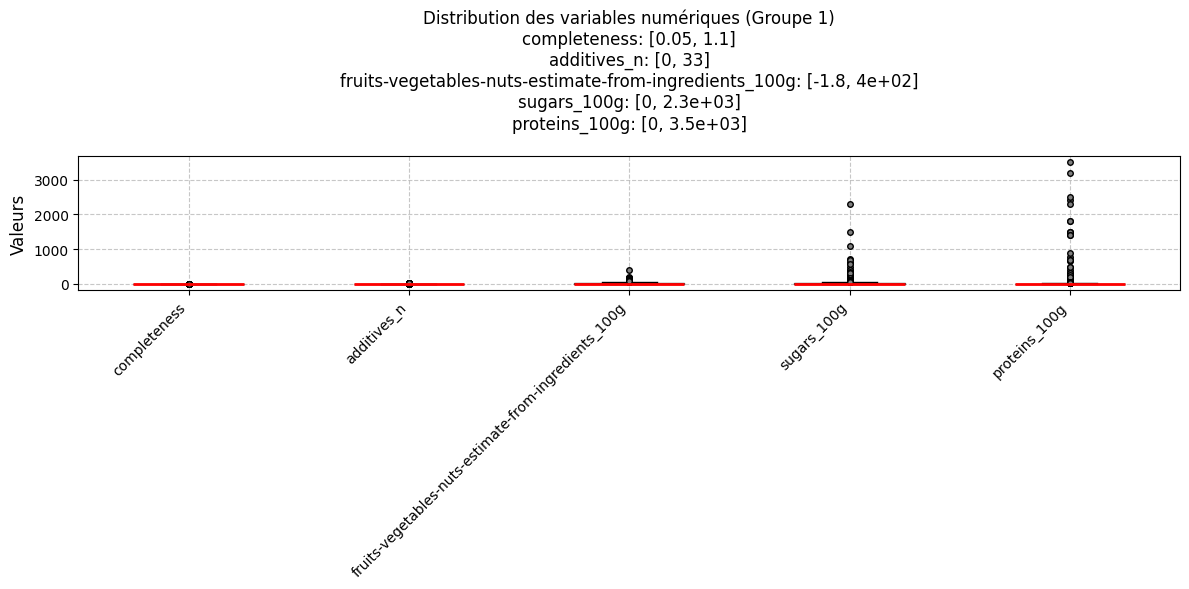


Statistiques détaillées pour le groupe 1

completeness:
  Moyenne: 0.41
  Écart-type: 0.14
  Min: 0.05
  Max: 1.1
  Nombre de valeurs non-nulles: 299987

additives_n:
  Moyenne: 2.7
  Écart-type: 3.4
  Min: 0
  Max: 33
  Nombre de valeurs non-nulles: 157512

fruits-vegetables-nuts-estimate-from-ingredients_100g:
  Moyenne: 19
  Écart-type: 31
  Min: -1.8
  Max: 4e+02
  Nombre de valeurs non-nulles: 157485

sugars_100g:
  Moyenne: 15
  Écart-type: 22
  Min: 0
  Max: 2.3e+03
  Nombre de valeurs non-nulles: 246413

proteins_100g:
  Moyenne: 7.7
  Écart-type: 18
  Min: 0
  Max: 3.5e+03
  Nombre de valeurs non-nulles: 255808


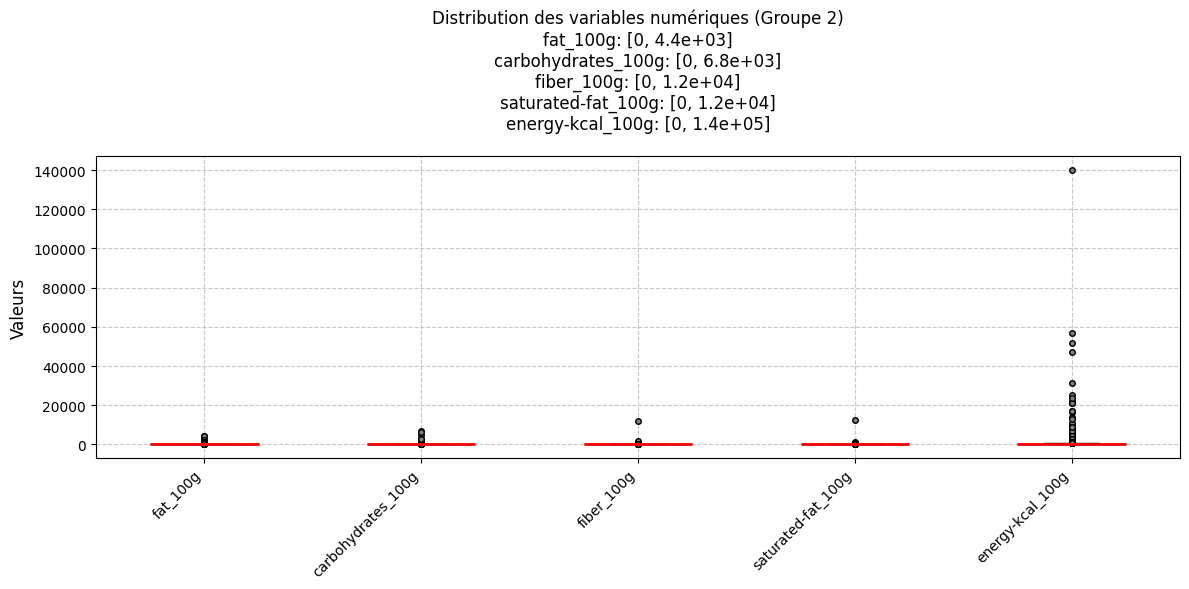


Statistiques détaillées pour le groupe 2

fat_100g:
  Moyenne: 12
  Écart-type: 23
  Min: 0
  Max: 4.4e+03
  Nombre de valeurs non-nulles: 255403

carbohydrates_100g:
  Moyenne: 33
  Écart-type: 38
  Min: 0
  Max: 6.8e+03
  Nombre de valeurs non-nulles: 256433

fiber_100g:
  Moyenne: 2.9
  Écart-type: 28
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 189807

saturated-fat_100g:
  Moyenne: 4.5
  Écart-type: 27
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 234514

energy-kcal_100g:
  Moyenne: 2.7e+02
  Écart-type: 4.1e+02
  Min: 0
  Max: 1.4e+05
  Nombre de valeurs non-nulles: 256829


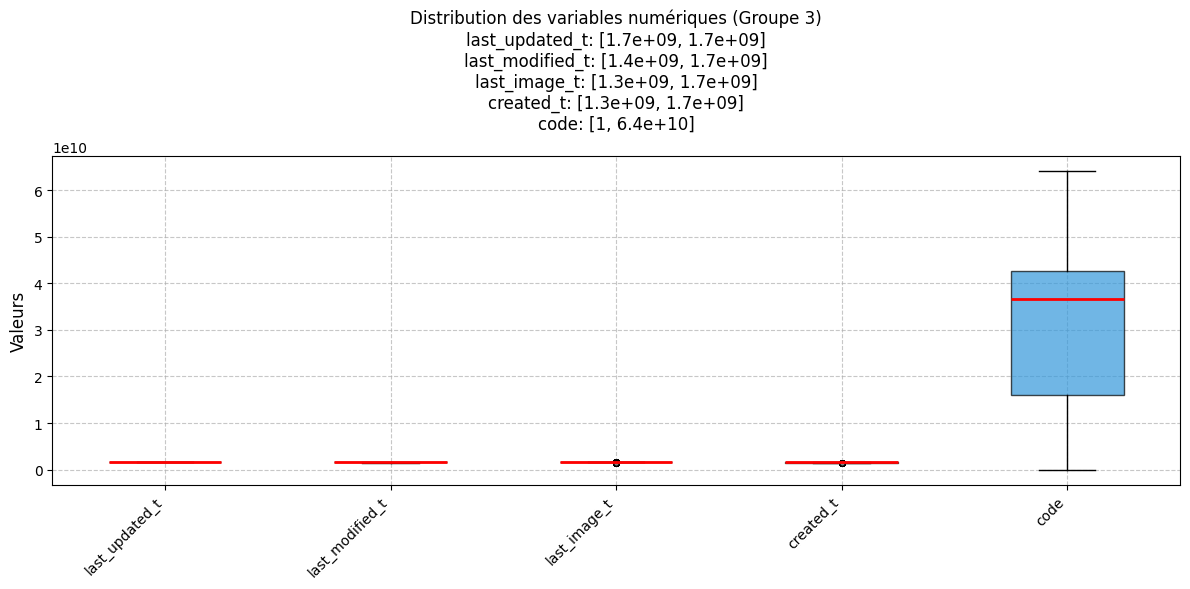


Statistiques détaillées pour le groupe 3

last_updated_t:
  Moyenne: 1.7e+09
  Écart-type: 1.2e+07
  Min: 1.7e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 299999

last_modified_t:
  Moyenne: 1.7e+09
  Écart-type: 6e+07
  Min: 1.4e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 300000

last_image_t:
  Moyenne: 1.7e+09
  Écart-type: 4.7e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 165086

created_t:
  Moyenne: 1.6e+09
  Écart-type: 7.8e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 300000

code:
  Moyenne: 3.2e+10
  Écart-type: 1.8e+10
  Min: 1
  Max: 6.4e+10
  Nombre de valeurs non-nulles: 300000


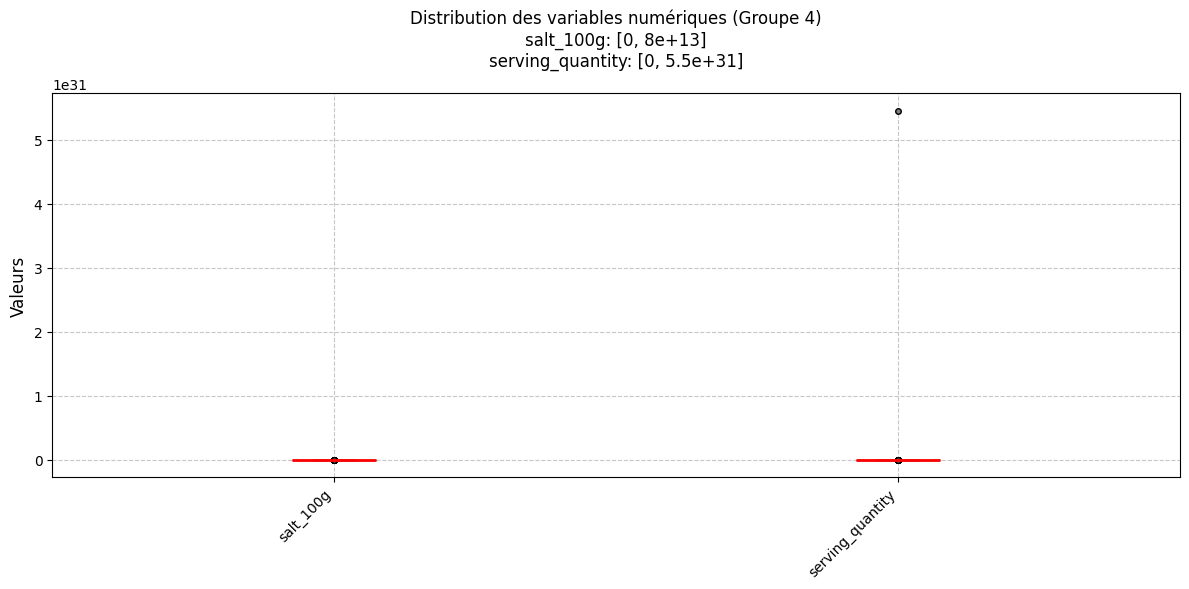


Statistiques détaillées pour le groupe 4

salt_100g:
  Moyenne: 3.4e+08
  Écart-type: 1.7e+11
  Min: 0
  Max: 8e+13
  Nombre de valeurs non-nulles: 232975

serving_quantity:
  Moyenne: 3.2e+26
  Écart-type: 1.3e+29
  Min: 0
  Max: 5.5e+31
  Nombre de valeurs non-nulles: 170942

Résumé des modifications :
Dimensions initiales : (300000, 206)
Dimensions finales : (300000, 19)

Réduction de la mémoire : 47.70%

Colonnes conservées :
- code: uint64
- created_t: uint32
- last_modified_t: uint32
- last_updated_t: float64
- serving_quantity: float64
- additives_n: float64
- nutriscore_grade: category
- pnns_groups_1: category
- completeness: float64
- last_image_t: float64
- energy-kcal_100g: float64
- fat_100g: float64
- saturated-fat_100g: float64
- carbohydrates_100g: float64
- sugars_100g: float64
- fiber_100g: float64
- proteins_100g: float64
- salt_100g: float64
- fruits-vegetables-nuts-estimate-from-ingredients_100g: float64


In [2]:
# Configuration des paramètres
params = {
    'max_categories': 30,
    'min_unique_ratio': 0.01,
    'missing_threshold': 0.5,
    'correlation_threshold': 0.7,
    'rare_threshold': 0.01,
    'verbose': True  # Pour afficher tous les détails
}

# Application de la fonction
df_filtered, analysis_report = filter_and_analyze_dataset(df, **params)

# Visualisation des résultats essentiels
plot_data_quality_dashboard(df_filtered, analysis_report['quality_report'])

# Afficher un résumé des modifications
print("\nRésumé des modifications :")
print(f"Dimensions initiales : {df.shape}")
print(f"Dimensions finales : {df_filtered.shape}")
print(f"\nRéduction de la mémoire : {analysis_report['memory_usage']['reduction_percentage']:.2f}%")

# Afficher les colonnes restantes et leurs types
print("\nColonnes conservées :")
for col, dtype in df_filtered.dtypes.items():
    print(f"- {col}: {dtype}")